# **Detecting Diabetes using Various Classification Algorithms**

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Understanding the Data

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.shape

(768, 9)

In [6]:
df.size

6912

In [7]:
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [8]:
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### ****As we have seen that some of the features such as BloodPressure,SkinThickness,BMI,Insulin ,Glucose can't be zero****

In [13]:
#Now hadnle those zero values with median of that feature
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
# df['BloodPressure'].median()

# Visualization

<Axes: ylabel='count'>

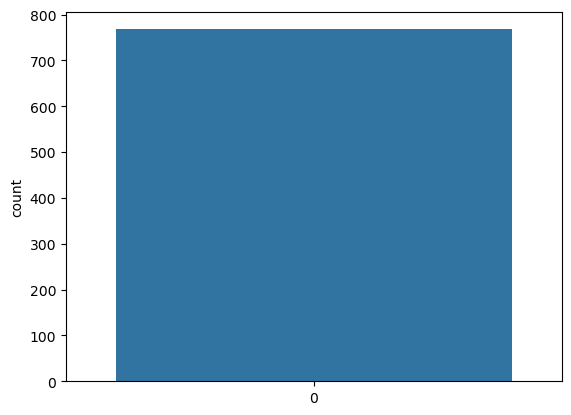

In [14]:
sns.countplot(df['Outcome'],label="Count")

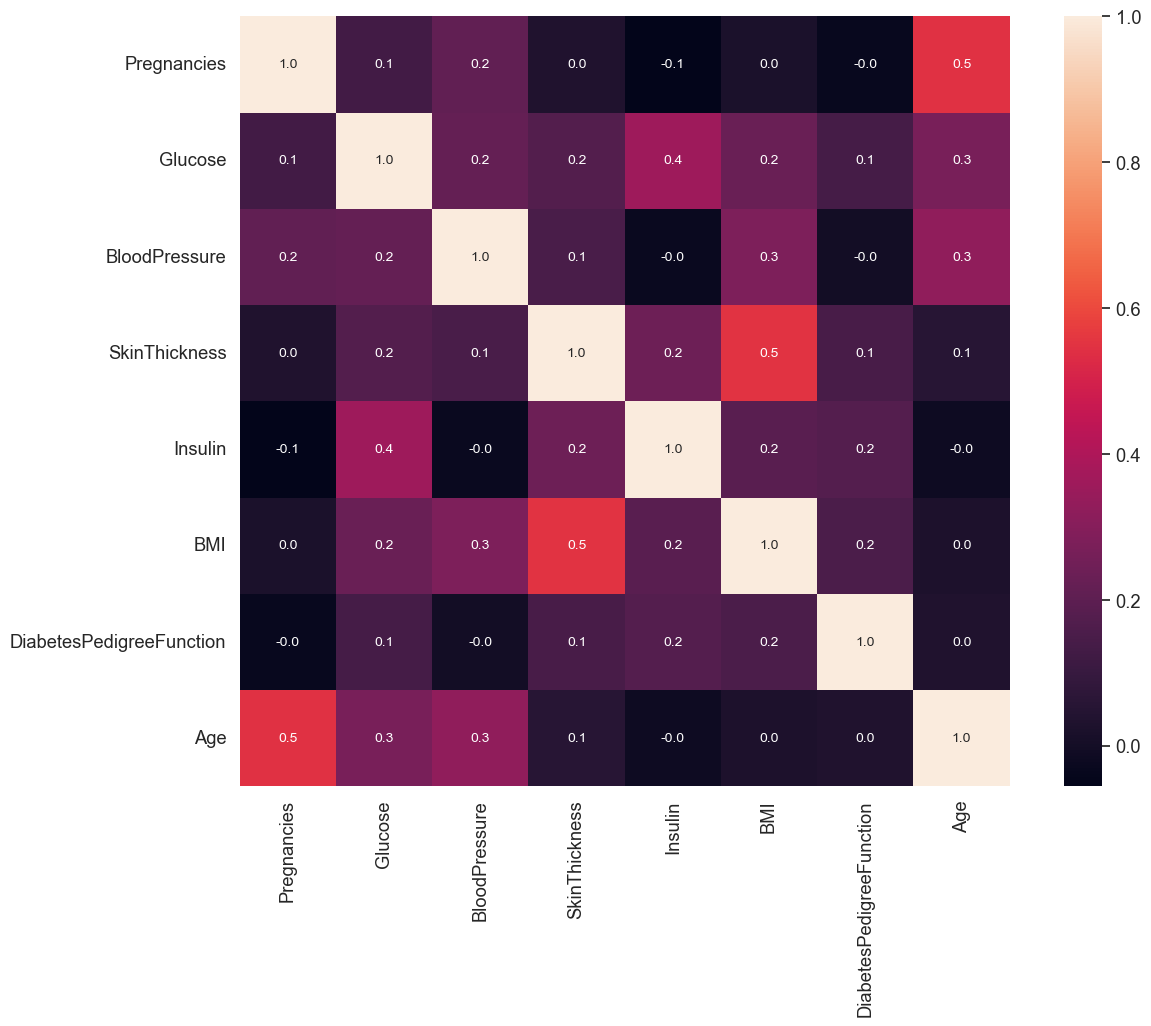

In [15]:
plt.figure(figsize=(14,10))
sns.set(style='whitegrid', context='notebook')
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.1f',annot_kws={'size': 10},yticklabels=cols,xticklabels=cols)
plt.show()

# Splitting of dataset into dependent and independent variables

In [16]:
X = df[cols] # Features
Y = df.Outcome # Target variable

In [17]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [18]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Splitting the data in Training and Testing

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset into a DataFrame
dataset = pd.read_csv('diabetes.csv')

# Separate features (X) and target variable (Y)
X = dataset.drop(columns=['Outcome'])  # Features
Y = dataset['Outcome']  # Target

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


# Standarization
**The features value are in diffrent ranges.So now we normalize the data in such a way that their mean=0 and Std.Deviation=1**

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Classification

In [21]:
#now we train our data on logistic regression model

from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state=2)
lm.fit(X_train, Y_train)

LogisticRegression(random_state=2)

## Prediction

In [22]:
Y_pred_train = lm.predict(X_train) #Actual = Y_train
Y_pred_test = lm.predict(X_test) #Actual = Y_test
# print(Y_pred_test)

### Accuracy

In [23]:
from sklearn.metrics import accuracy_score
lr_train_acc = accuracy_score(Y_train,Y_pred_train)
lr_test_acc =  accuracy_score(Y_test,Y_pred_test)
print(lr_train_acc,lr_test_acc)

0.762214983713355 0.8246753246753247


## Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
def confusion_matrix_plot(test,pred_test):
    cmat = confusion_matrix(test, pred_test)
    sns.heatmap(pd.DataFrame(cmat), annot=True, cmap="YlGn" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    

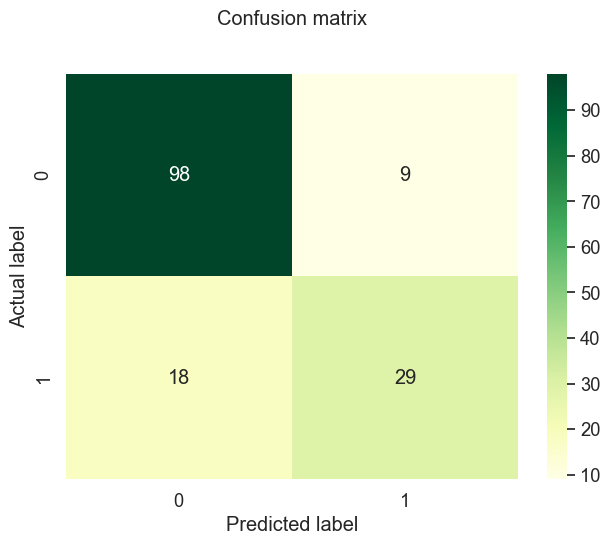

In [25]:
confusion_matrix_plot(Y_test,Y_pred_test)

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

#fitting data
dt.fit(X_train,Y_train)

#predicting values
dt_Y_pred_train = dt.predict(X_train) 
dt_Y_pred_test = dt.predict(X_test)

## Accuracy

In [27]:
dt_train_acc = accuracy_score(Y_train,dt_Y_pred_train)
dt_test_acc = accuracy_score(Y_test,dt_Y_pred_test)
print(dt_train_acc,dt_test_acc)

1.0 0.7597402597402597


## Confusion Matrix

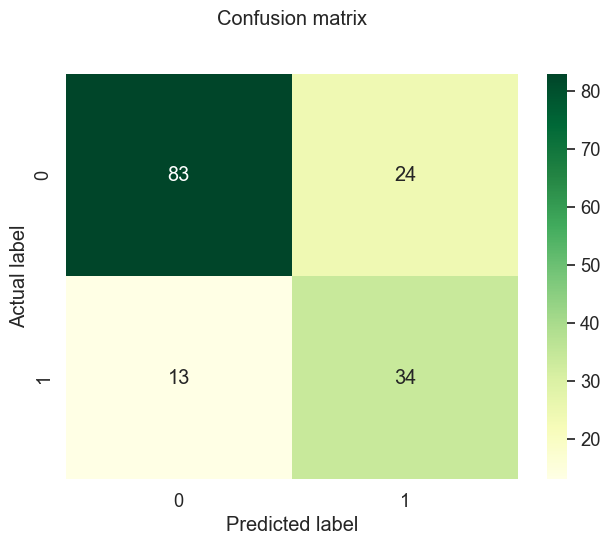

In [28]:
confusion_matrix_plot(Y_test,dt_Y_pred_test)

# Support Vector Machine

In [29]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)

SVC()

## Prediction

In [30]:
Y_test_pred_svc = model.predict(X_test)
Y_train_pred_svc = model.predict(X_train)


## Accuracy

In [31]:
svc_train_acc = accuracy_score(Y_train,Y_train_pred_svc)
svc_test_acc = accuracy_score(Y_test,Y_test_pred_svc)
print(svc_train_acc,svc_test_acc)

0.8192182410423453 0.7922077922077922


## Confusion Matrix

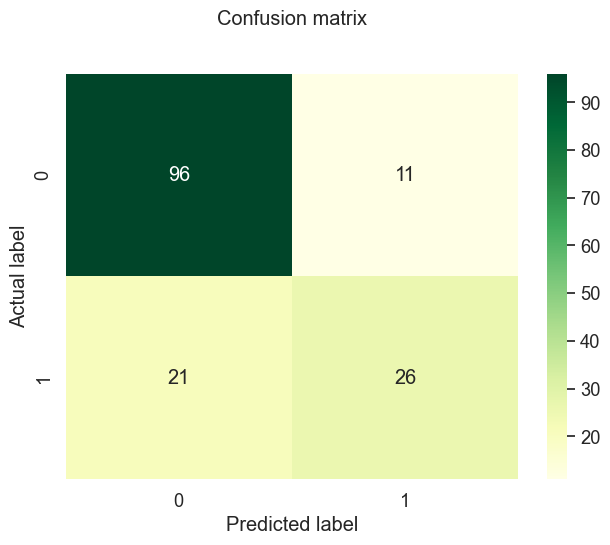

In [32]:
confusion_matrix_plot(Y_test,Y_test_pred_svc)

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2)
rf.fit(X_train,Y_train)

rf_Y_train_pred = rf.predict(X_train)
rf_Y_test_pred = rf.predict(X_test)

## Accuracy

In [34]:
rf_train_acc = accuracy_score(Y_train,rf_Y_train_pred)
rf_test_acc = accuracy_score(Y_test,rf_Y_test_pred)
print(rf_train_acc,rf_test_acc)

1.0 0.8116883116883117


## Confusion Matrix

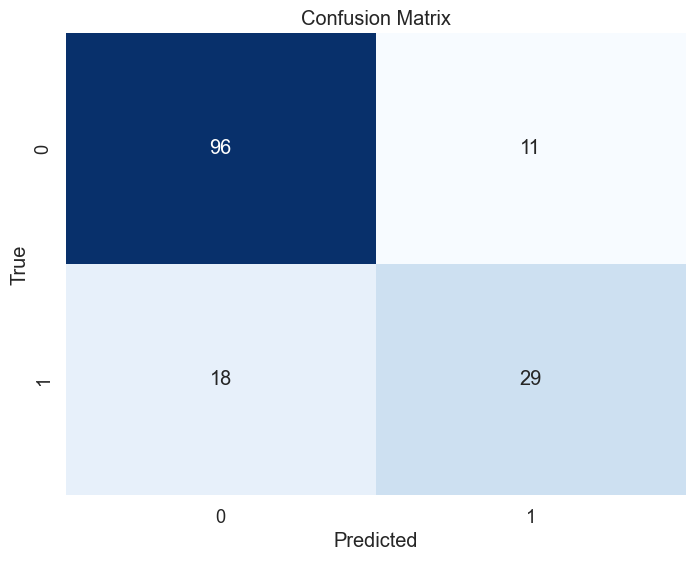

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming rf_Y_test_pred and Y_test are already defined
plot_confusion_matrix(Y_test, rf_Y_test_pred)


# Saving the model

In [36]:
import pickle
pickle.dump(lm,open('logistic_regression.pkl','wb'))
pickle.dump(dt,open('Decision_Tree_Classifier.pkl','wb'))
pickle.dump(model,open('SVM.pkl','wb'))
pickle.dump(rf,open('Random_Forest_Classifier.pkl','wb'))



---

